**Task description**

Fitness club chain "Bodybuilder Data Scientists" develops the user interaction strategy based on data.
Сommon problem for fitness clubs or others services is the client churn.
How to understand that the client is no longer with you? We can consider the users, who asked to close the contract or deleted the account, as churned. However, customers do not always leave defiantly: they often stop using the service quietly.
Churn indicators are industry specific. When a user rarely but steadily buys in an online store, it doesn’t look like he “fell off”. But if you don’t visit a channel with daily updated content for two weeks, things are bad: the subscriber got bored and seems to have left you.
For a fitness center, we can consider that a client has been churned if he has never visited the gym in the last month. Of course, it is possible that he go to Bali and upon arrival will definitely continue to go to fitness. However, the opposite is more often the case. If a client started a new life on Monday, went to the gym for a bit, and then disappeared, most likely he will not return.
To prevent user churn, "Bodybuilder Data Scientist" customer service department has digitized many client profiles. Our task is to analyze and prepare an action plan to retain customers.


-to learn how to predict the probability of outflow (at the level of the next month) for each client;

-to form typical client portraits: identify several of the most striking groups and characterize their main properties;

-to analyze the main features that most strongly affect the outflow;

-to formulate the main conclusions and develop recommendations for improving the quality of work with clients:

1)to identify target customer groups;

2)to suggest measures to reduce churn;

3)to identify other features of interaction with customers.



**Client data for the previous month before checking the churn fact**

Данные клиента за предыдущий до проверки факта оттока месяц:

'gender' — пол   (**assume that 0 - male, 1 - female**) ;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Information based on the log of visits, purchases and information about the current status of the client's subscription:**


'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

'Churn' — факт оттока в текущем месяце.

### Data exploration. Preprocessing
Изучение данных. Предобработка

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
#import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
def to_type(data_to_write, column, target_type):
    data_to_write[column] = data_to_write[column].astype(target_type)

In [4]:
#read dataset и save it in data

df = pd.read_csv('/datasets/gym_churn.csv')

df.head(5)  

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
#transform column name to low registr 
df.columns = df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [7]:
to_type(df, 'month_to_end_contract', 'int8')
#to_type(df, 'contract_period', 'int8')
#to_type(df, 'age', 'int8')
#to_type(df, 'lifetime', 'int8')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int8   
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [9]:
df.head(5)  

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


We are going to check out missing values and dublicates

Проверим наличие дубликатов и пропущенных значений

In [10]:
print('Duplicate count/Количество дубликатов:', df.duplicated().sum())

Duplicate count/Количество дубликатов: 0


In [11]:
print('Missing value count/Количество пропущеных значений:', df.isnull().sum())

Missing value count/Количество пропущеных значений: gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


#### Summary

binary features: 'churn','gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits'



### Perform Exploratory Data Analysis (EDA)
Проведите исследовательский анализ данных (EDA)

In [12]:
print(df.shape)
print(df.head(3))

(4000, 14)
   gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                      5   
1             1   31                    113.202938                     12   
2             0   28                    129.448479                      1   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   

   churn  
0      0  
1      0  
2      0  


In [13]:
#look up common information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int8   
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [15]:
df_0=df.query('churn==0')
df_1=df.query('churn==1')

In [16]:
print('remaining clients')
df_0.describe().T

remaining clients


,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


In [17]:
print('Churn')
df_1.describe().T

Churn


,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


1.It can be seen that the younger the client, the more likely they are to leave. Perhaps we should launch some program for young visitors for user retention.

2.Churn does not depend on gender

3.Group classes attendance does not depend on gender.

#### Check out mean values for 2 groups - churn and left
Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [18]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


#### Build hist graphs and feature distributions for those who left (churn) and those who stayed (did not churn);

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

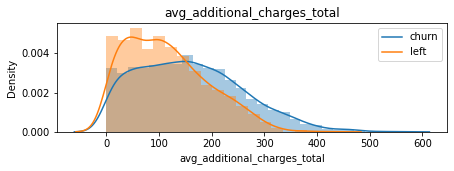

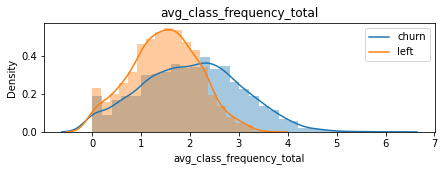

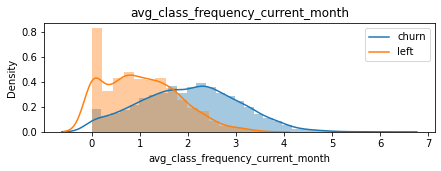

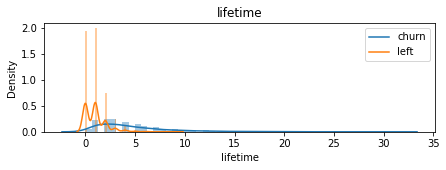

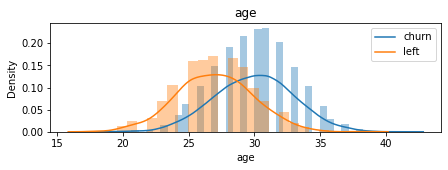

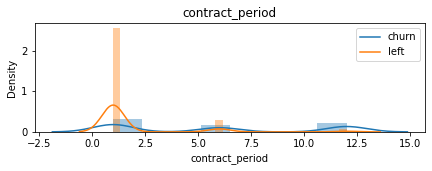

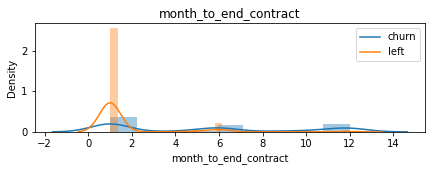

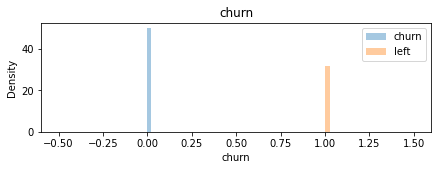

In [19]:
def PrintChurn0():
    column_list = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract', 'churn']
    for column in column_list: 
        plt.figure(figsize=(7,2)) 
        plt.title(column)
        sns.distplot(df_0[column])
        sns.distplot(df_1[column])
        plt.legend(['churn', 'left'])
        plt.show()
        
PrintChurn0()

#### Building histograms for binary features
Строим гистограммы для бинарных признаков

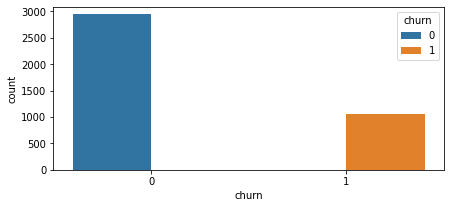

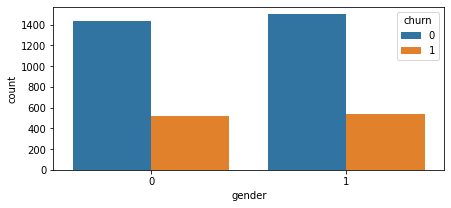

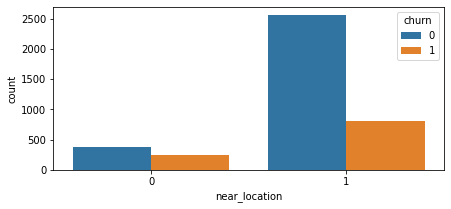

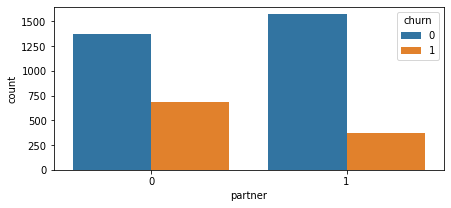

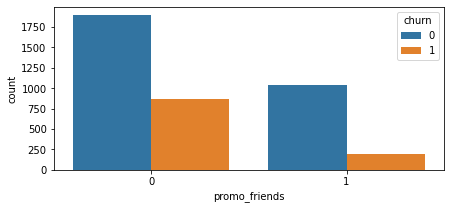

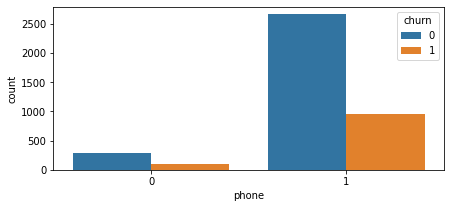

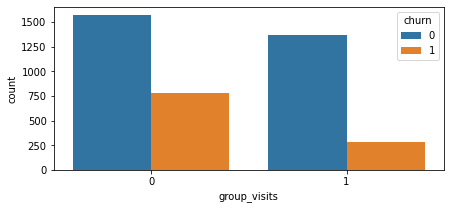

In [20]:
for column in ['churn','gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(7, 3))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title('')
    plt.show()

In [21]:
gender_churn_t = df[df['churn'] == 1].groupby(['gender'])['churn'].agg('count').reset_index()
gender_churn_t

,gender,churn
0,0,519
1,1,542


<div class="alert alert-success">
<b>Reviewer comments: ✅</b>

Отличный способ визуализации, в том числе можно было бы построить наши графики с помощью метода `subplots`, например в 2 колонки, для нашего удоства в их изучении.
    
Тут можно посмотреть примеры. 
    
- `matplotlib`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html
- `plotly` : https://plotly.com/python/subplots/
    

</div>

In [22]:
gender_churn_f = df[df['churn'] == 0].groupby(['gender'])['churn'].agg('count').reset_index()
gender_churn_f

,gender,churn
0,0,1440
1,1,1499


In [23]:
gender_group_t = df[df['group_visits'] == 1].groupby(['gender'])['group_visits'].agg('count').reset_index()
gender_group_t

,gender,group_visits
0,0,790
1,1,859


#### Build a correlation matrix and display it with heatmap

Рассчитаем матрицу корреляций и на её основе построим heatmap

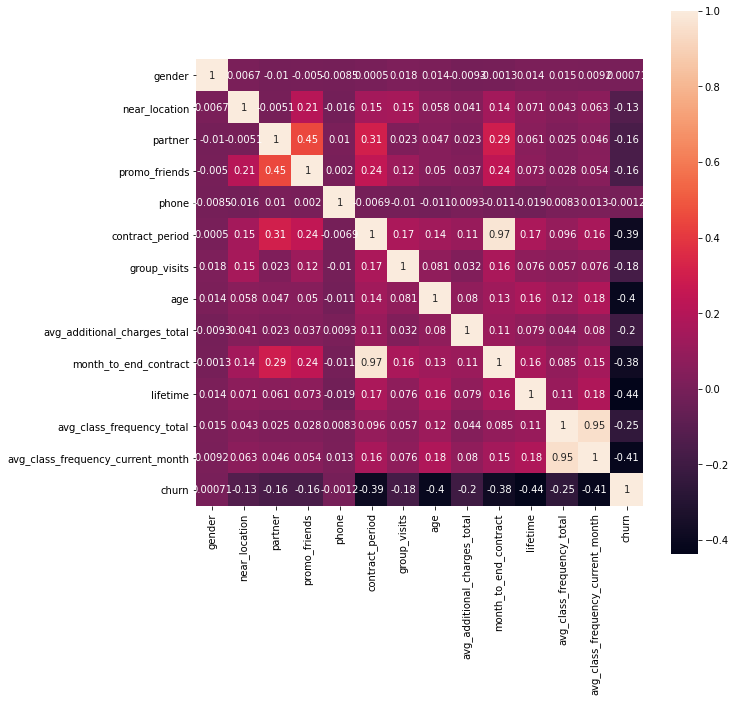

In [24]:
corr_m = df.corr()


plt.figure(figsize = (10,10))
sns.heatmap(corr_m,square = True, annot = True)

plt.show()

Strongly correlated: contract_period и month_to_end_contract, avg_class_frequency_current_month и avg_class_frequency_total. 

To get rid of multicollinearity, remove one of each pair from the dataframe:

In [25]:
df_gym=df.drop(['month_to_end_contract','avg_class_frequency_current_month'], axis=1)

In [26]:
df_gym.head(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0


#### Summary

1.It can be seen that the younger the client, the more likely they are to leave. Perhaps we should launch some program for young visitors for user retention.

2.Churn does not depend on gender

3.Group classes attendance does not depend on gender.

4. Users who live/work near the gym are less likely to churn.

5. Most users have provided a phone number, but this does not affect churn.

6. Most of the users who fell into the churn had a subscription for only 1 month.



The average age of clients is 29 years. The minimum age is 18 years old. The maximum age is 41.

Women and men are about the same number.

Average churn rate 26.5%

41% of clients attend group classes.

The average subscription duration is 3.72 months.

85% of clients live or work near a fitness center.

31% of customers came through the promotion a "invite friend".

49% of clients came through an partner program.


The average duration of the current active subscription is 4.7 months.

The average time until the end of the current active subscription is 4.3 months.

Average total revenue from additional services - 146 units.

The average frequency of visits per week for the entire time since the beginning of the subscription is 1.88.

Average frequency of visits per week for the previous month - 1.77

90% of customers provided their phone number.

Average time since the first access to the fitness center - 3.7 months


### Build a Churn Prediction Model

Build a model of binary classification of customers, where the target feature is the fact that a customer churns in the next month:

Split the data into training and validation samples using the train_test_split() function.


We will train the model on a train-sample in two ways: logistic regression, random forest.

Evaluate the accuracy, precision and recall metrics for both models on the validation set. 

Compare models.


In [27]:
X = df_gym.drop('churn', axis = 1)
y = df_gym['churn']

Divide the data into features (matrix X) and target variable (y)


Split the data into **train data** and **validation data** using the train_test_split() function. 70/30


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<div class="alert alert-success">
<b>Reviewer comments: ✅</b>

    
В целом выборка разделена верно. 
Я бы рекомендовал бы ещё использовать атрибут `stratify`, поместив в него целевую переменную. Он дает нам безопасность сохранения 20% значений равного нужного нам количества классов в целевой переменной.
    
Пример: `stratify=y`
    
---
    
Хорошо, что используем параметр `random_state`, чтобы получать одни и те же результаты.
    
</div>

Standardizing data


In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Let's train the model on a train data in two ways: logistic regression, RandomForestRegressor.


 **logistic regression**

In [30]:
model_lr = LogisticRegression(random_state=0) 
model_lr.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [31]:
predictions_lr = model_lr.predict(X_test_st)
probabilities_lr = model_lr.predict_proba(X_test_st)[:,1]

accuracy - доля правильных ответов 

precision-точность

recall-полнота 

F1_score - сводная метрика, учитывающая баланс между метриками

In [32]:
print('Metrics for the logistic regression model:')
print('Accuracy: {:.2f}\nPrecision: {:.2f}\nRecall:{:.2f}\nF1:{:.2f}'.format(
    accuracy_score(y_test,predictions_lr),
    precision_score(y_test, predictions_lr),
    recall_score(y_test,predictions_lr),
    f1_score(y_test, predictions_lr)
))

Metrics for the logistic regression model:
Accuracy: 0.90
Precision: 0.81
Recall:0.81
F1:0.81


Receiver Operating Characteristic

площадь под кривой ошибок — AUC-ROC

In [33]:
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, probabilities_lr)))

ROC_AUC: 0.95



**RandomForestRegressor**

In [34]:
model_rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [35]:
model_rfc.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [36]:
predictions_rfc = model_rfc.predict(X_test_st)
probabilities_rfc = model_rfc.predict_proba(X_test_st)[:,1]
print('Metrics for RandomForestRegressor:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, predictions_rfc),
    precision_score(y_test, predictions_rfc),
    recall_score(y_test, predictions_rfc)
))

Metrics for RandomForestRegressor:
accuracy_score: 0.8966666666666666
precision_score: 0.8037974683544303
recall_score:0.8037974683544303


create a dataframe with feature names and their importance and display it in descending order of importance

In [37]:
fi_df = pd.DataFrame(model_lr.coef_.T, X.columns).reset_index()
fi_df.columns = ['feature', 'importance']
fi_df['importance'] = fi_df['importance'].apply(lambda x: abs(x)).round(2)
fi_df = fi_df.sort_values(by='importance', ascending=False)
fi_df

,feature,importance
9,lifetime,3.74
5,contract_period,1.41
7,age,1.09
10,avg_class_frequency_total,0.72
8,avg_additional_charges_total,0.54
6,group_visits,0.40
3,promo_friends,0.25
4,phone,0.10
1,near_location,0.09
2,partner,0.05


#### Summary


We can see that accuracy, recision, recall  when using logical regression is higher than when using a random forest model. The logical regression model perfomed to be better.

<div class="alert alert-success">
<b>Reviewer comments ✅</b>
   
Здорово, что рассчитываешь метрику `F1`, которая как раз включает в себя основные параметры точности и полноты. 
    
В том числе рекомендую смотреть на метрику `ROC–AUC` с точки зрения визуализации. 
    
    
Ниже статья, в которой есть материалы про метрики и как их визуализировать.
    
https://habr.com/ru/company/ods/blog/328372/
    
---

Можно также попробовать и сравнить параметр `C` у логистической регрессии. У случайного леса количество деревьев (`n_estimators`) и максимальную глубину дерева (`max_depth`), чтобы осуществить поиск лучшей модели.
    
---
    
Кстати для автоматического перебора гиперпараметров мы можем использовать готовый метод `GreadSearchCV` в библиотеке `sklearn`. 
    
</div>

### Perform client clustering


Let's perform the standardization and pass the resulting standardized table as a parameter to the linkage() function. To make the chart more representative, it is better to pass the value 'ward' to the method parameter:

In [38]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

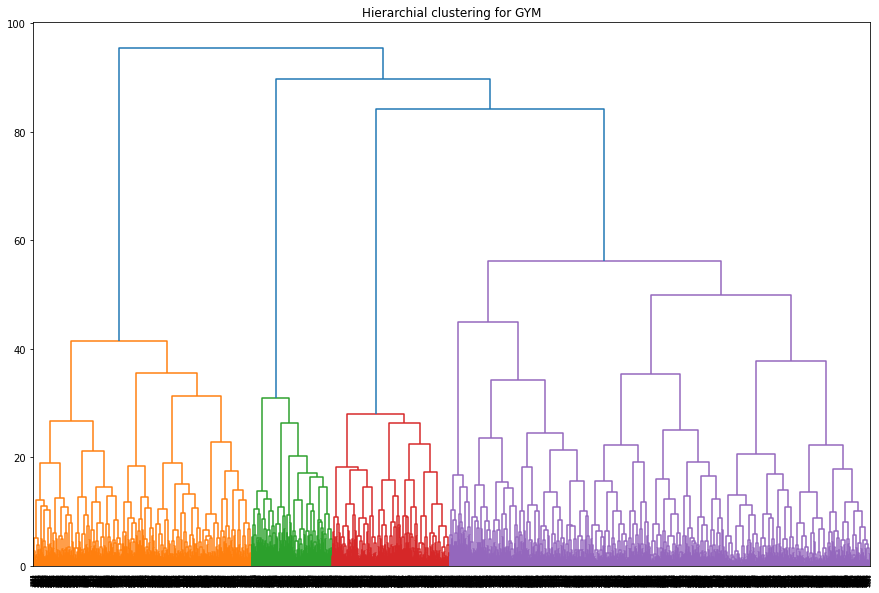

In [39]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

<div class="alert alert-success">
<b>Reviewer comments: ✅</b>
    
Отлично 👍

В том числе чтобы определить количество кластеров можно использовать метод локтя. 
    
Ниже статья с двумя методами, которые можно в том числе использовать для определения количества кластеров.
    
https://habr.com/ru/company/jetinfosystems/blog/467745/
    
</div>

According to the diagram, we have a division into 4 clusters.
According to the technical requirements, we accept the number of clusters n=5.
Let's train a clustering model based on the K-Means algorithm and predict customer clusters.


In [47]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(df_gym)
df_gym['cluster'] = labels

In [48]:
df_gym.cluster.value_counts()

4    1033
0    1027
2     963
1     706
3     271
Name: cluster, dtype: int64

In [49]:
df_gym.head(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0,4


Let's look at the average values of features for clusters. Is it possible to notice something right away?

In [50]:
df_gym.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.507303,0.521246,0.510903,0.468635,0.515973
near_location,0.824732,0.881020,0.844237,0.856089,0.839303
partner,0.487829,0.511331,0.495327,0.516605,0.453049
promo_friends,0.293087,0.347025,0.319834,0.332103,0.280736
phone,0.908471,0.898017,0.902388,0.926199,0.897386
contract_period,4.193768,5.400850,4.751817,5.822878,4.308809
group_visits,0.387537,0.433428,0.423676,0.431734,0.406583
age,28.912366,29.344193,29.402908,29.845018,28.968054
avg_additional_charges_total,35.430090,250.984767,174.837664,356.481960,105.728636
lifetime,3.387537,4.169972,3.748702,4.420664,3.550823


For each resulting cluster, the churn rate is:

0 - 32.4%

1 - 18%

2 - 35.8%

3 - 5.4%

4 - 23.8%

churn prone clusters - 0 and 2

most reliable cluster - 3




Churn-prone clusters have a lower average age and spend the least incremental spending. they also have a lower total number of visits and the duration of the current subscription.


Note that churn-prone clusters 0 and 2 are the largest portion of users 1012 and 992.
In the most reliable cluster 3, on the contrary, there are the fewest clients - 294.

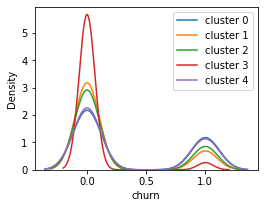

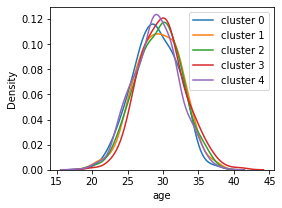

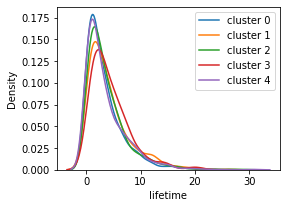

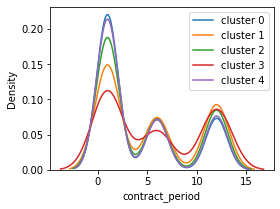

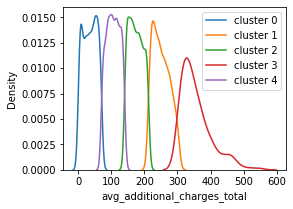

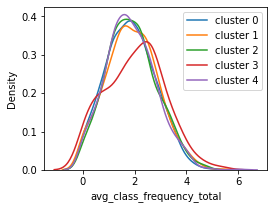

In [51]:
def PrintChurn1():
    df_c0 = df_gym.query('cluster==0')
    df_c1 = df_gym.query('cluster==1')
    df_c2 = df_gym.query('cluster==2')
    df_c3 = df_gym.query('cluster==3')
    df_c4 = df_gym.query('cluster==4')
    column_list = ['churn','age','lifetime','contract_period','avg_additional_charges_total', 'avg_class_frequency_total']
    for column in column_list: 
        plt.figure(figsize=(4, 3))
        plt.title('')   
        sns.kdeplot(df_gym.query('cluster==0')[column], label = 'Кластер 0')
        sns.kdeplot(df_gym.query('cluster==1')[column], label = 'Кластер 1')
        sns.kdeplot(df_gym.query('cluster==2')[column], label = 'Кластер 2')
        sns.kdeplot(df_gym.query('cluster==3')[column], label = 'Кластер 3')
        sns.kdeplot(df_gym.query('cluster==4')[column], label = 'Кластер 4')
        plt.legend(['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'])
        plt.show()
        
PrintChurn1()

**Build distribution for binar features**


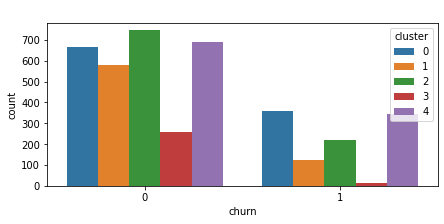

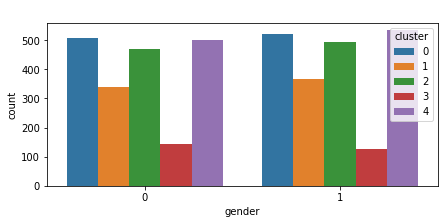

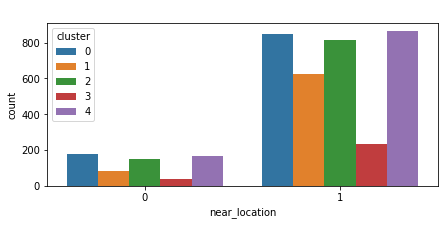

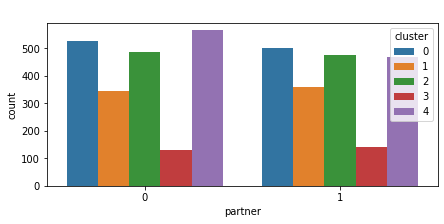

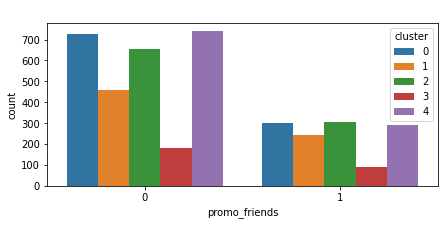

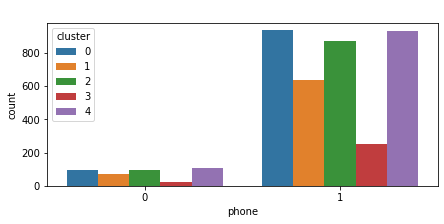

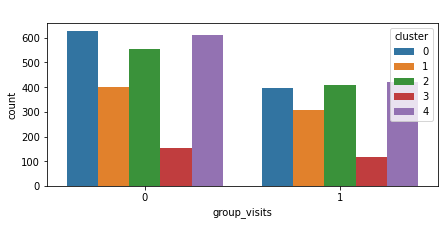

In [52]:
for column in ['churn','gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(7, 3))
    sns.countplot(x = df_gym[column], hue='cluster', data=df_gym)
    plt.title(' ')
    plt.show()

#### Summary 

The gender distribution in all clusters is approximately the same.

churn prone clusters - 0 and 2 most reliable cluster - 3

Churn-prone clusters have a lower average age and spend the least incremental spending. they also have a lower total number of visits and the duration of the current subscription, and a greater distance from home / work. Cluster 3 participates least of all in the refer-a-friend program and most often is not a partner.

It is necessary to pay attention to the fact that churn-prone clusters 0 and 2 are the most significant part of clients 1012 and 992. In the most reliable cluster 3, on the contrary, the least number of clients is 294.

### Formulate conclusions and make basic recommendations for working with clients


**Audience attraction:**

It can be seen that the younger the client, the more likely they are to leave. It may be worth considering launching special offers for young visitors to retain the audience.

We also see that there are practically no visitors of retirement age, it is also recommended to consider the possibility of attracting this category with special offers.

It is necessary to pay attention to the fact that churn-prone clusters 0 and 2 are the most significant part of clients 1012 and 992. In the most reliable cluster 3, on the contrary, the least number of clients is 294.


**Subscription period:**

It is recommended to consider the possibility of increasing the minimum subscription period from 1 month to 3 months.
Most of the churn clients had a 1-month subscription with an average visit once a month - it might be worth attracting new clients with special offers - massage as a gift, free first personal training, calls with reminders of the subscription expiration date.


**Additional services:**

For particular recommendations, additional information is needed on the list of services offered and their cost, as well as the number of purchases.
